# **Linear Regression Project**
##  **By Rahul Sah**
### Under The Sparks Foundation
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
## Project overview
In this project, I build a Simple Linear Regression model to study the linear relationship between studying hours and percentage of marks obtained.

### Linear Regression
Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.

Simple Linear Regression (SLR)
Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

In this project, there is one independent or input variable which represents the Hours of study and is denoted by X. Similarly, there is one dependent or output variable which represents the Scored percentage and is denoted by y. We want to build a linear relationship between these variables. This linear relationship can be modelled by mathematical equation of the form:-

             Y = β0   + β1*X    -------------   (1)


In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.

For simplicity, we can compare the above equation with the basic line equation of the form:-

               y = ax + b       ----------------- (2)

We can see that

slope of the line is given by, a = β1, and

intercept of the line by b = β0.

In this Simple Linear Regression model, we want to fit a line which estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1.

In [39]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### Libraries
- Pandas is the foundation library for data analysis and manipulation.
- NumPy is the fundamental package for scientific computing in Python
- Seaborn is a popular Python library for making statistical data.
- Sklearn provides tools for fitting models, preprocessing data, selecting and evaluating models, etc. It’s built on NumPy, SciPy, and matplotlib libraries.

### Reading Data 

In [40]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print("Data imported successfully ...")
df.head(10)

Data imported successfully ...


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting Graph

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

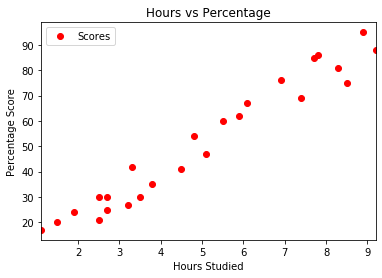

In [41]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores',style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Observation
From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [42]:
X =df.iloc[:, :-1].values  
y =df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


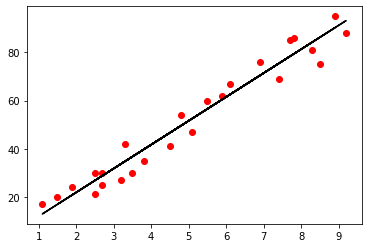

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color='black');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [46]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
new_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [48]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [49]:
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [50]:
#Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 4.6474
